In [1]:
#!pip install catboost
# !pip install scikit-learn==0.24.2

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# from ucimlrepo import fetch_ucirepo

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import f_classif, SelectKBest


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, r2_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.inspection import permutation_importance

from catboost import CatBoostClassifier
from sklearn. preprocessing import OneHotEncoder

from seaborn import pairplot
from sklearn.metrics import accuracy_score

pd.options.display.max_columns = 60

'''
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from IPython.display import Image

pd.options.plotting.backend = 'plotly'
pio.templates["standard"] = go.layout.Template(layout=dict(
    title_font_family = 'Courier',
    font_size = 20,
    margin = dict(t=50, b=0, l=50, r=0),
    yaxis_nticks = 4,
    xaxis_nticks = 5,
    legend_title = '',
    legend_font_family = 'Courier',
    legend_orientation = 'v',
    legend_xanchor = 'right',
    legend_bgcolor = 'rgba(256,256,256,0.8)',
    legend_x = 1,
    legend_y = 1.15,
    width = 1150, 
    height = 500)
)
colors = px.colors.qualitative.Plotly
pio.templates.default = 'simple_white+standard'
'''

'\nimport plotly.graph_objects as go\nimport plotly.express as px\nimport plotly.io as pio\nfrom IPython.display import Image\n\npd.options.plotting.backend = \'plotly\'\npio.templates["standard"] = go.layout.Template(layout=dict(\n    title_font_family = \'Courier\',\n    font_size = 20,\n    margin = dict(t=50, b=0, l=50, r=0),\n    yaxis_nticks = 4,\n    xaxis_nticks = 5,\n    legend_title = \'\',\n    legend_font_family = \'Courier\',\n    legend_orientation = \'v\',\n    legend_xanchor = \'right\',\n    legend_bgcolor = \'rgba(256,256,256,0.8)\',\n    legend_x = 1,\n    legend_y = 1.15,\n    width = 1150, \n    height = 500)\n)\ncolors = px.colors.qualitative.Plotly\npio.templates.default = \'simple_white+standard\'\n'

### Import data

In [58]:
df = pd.read_csv('Train.csv')
y = df['CHURN']
X = df.drop('CHURN',axis=1)
X.head(5)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0


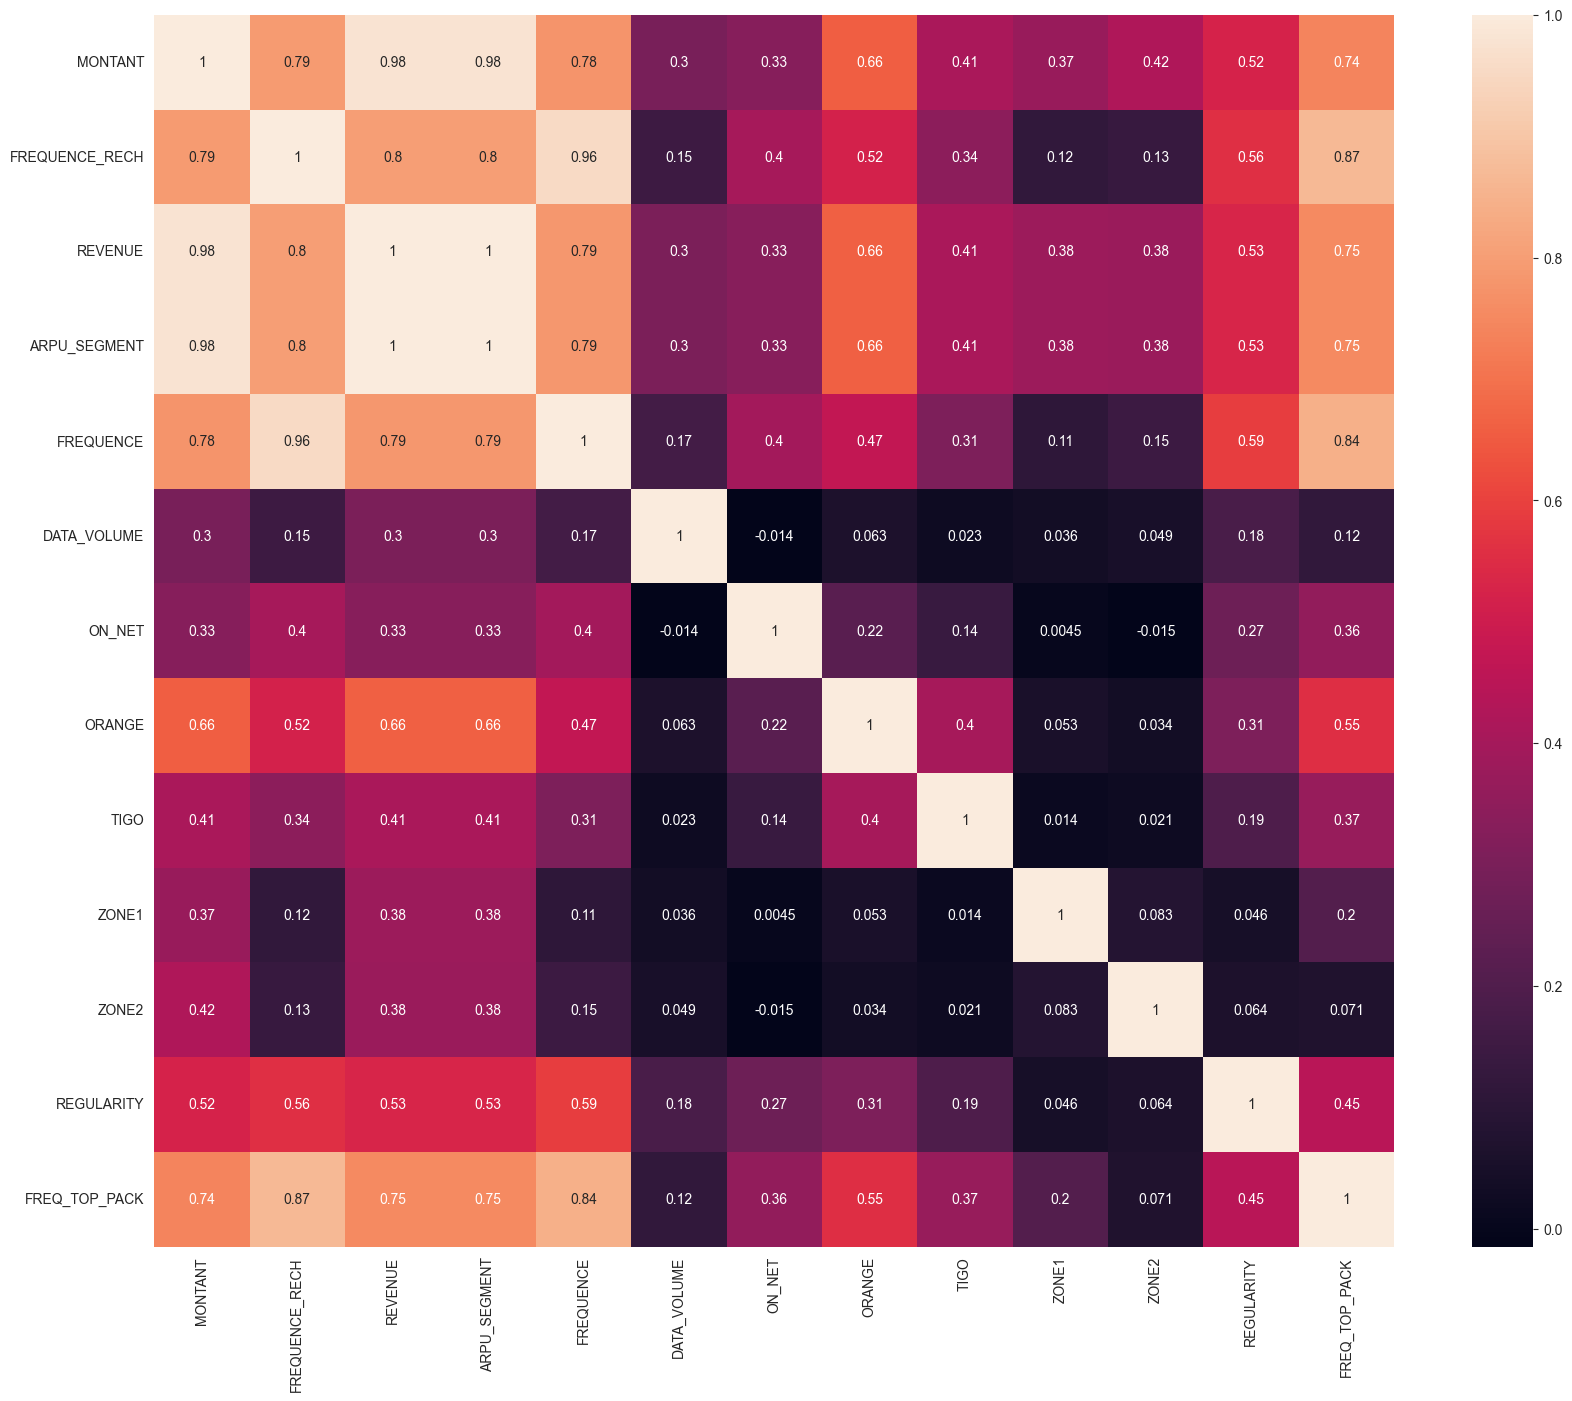

In [59]:
correlation_matrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 16))
sb.heatmap(correlation_matrix, annot=True)
plt.plot()
plt.show()

# Data preprocessing

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 18 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
dtypes: float64(12), int64(1), object(5)
memory usage: 295.8+ MB


In [16]:
X.isna().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
dtype: int64

#### Fill NANs in categorical and numerical columns

In [4]:
#Categorical features
ojb_col_names = list(X.select_dtypes(include=['object']).columns)
X[ojb_col_names] = X[ojb_col_names].fillna('unknown')

#Numerical features
num_col_names = list(X.select_dtypes(include=['float64', 'int64']).columns)
X[num_col_names] = X[num_col_names].fillna(0)

In [6]:
X.isna().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
dtype: int64

#### Encoding of categorical features & one-hot encoding

In [61]:
for name in ojb_col_names:
    print(name,':',len(X[name].value_counts()))

user_id : 2154048
REGION : 15
TENURE : 8
MRG : 1
TOP_PACK : 141


In [ ]:
X.MRG.value_counts()
#All values are 'NO'

NO    2154048
Name: MRG, dtype: int64

In [ ]:
X.TENURE.value_counts()

K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: TENURE, dtype: int64

In [ ]:
X.TOP_PACK.value_counts()

unknown                           902594
All-net 500F=2000F;5d             317802
On net 200F=Unlimited _call24H    152295
Data:490F=1GB,7d                  115180
Data: 100 F=40MB,24H               84649
                                   ...  
CVM_100f=500 onNet                     1
1500=Unlimited7Day                     1
FIFA_TS_weekly                         1
Postpaid FORFAIT 10H Package           1
Package3_Monthly                       1
Name: TOP_PACK, Length: 141, dtype: int64

In [5]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(X[['REGION']])
X[ohe.categories_[0]] = transformed.toarray()
X.drop(['REGION','unknown'],axis=1,inplace=True)

ohe_t = OneHotEncoder()
tenure = ohe_t.fit_transform(X[['TENURE']])
X[ohe_t.categories_[0]] = tenure.toarray()
X.drop(['TENURE','D 3-6 month'],axis=1,inplace=True)


In [6]:
#it is bad as it is not one-hot encoder but 141 different values are too much to process for my computer
encoder = LabelEncoder()
X['TOP_PACK'] = encoder.fit_transform(X['TOP_PACK'])
#maybe it is okay to just drop 'TOP_PACK' columns

In [8]:
X.columns

Index(['user_id', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1',
       'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'DAKAR',
       'DIOURBEL', 'FATICK', 'KAFFRINE', 'KAOLACK', 'KEDOUGOU', 'KOLDA',
       'LOUGA', 'MATAM', 'SAINT-LOUIS', 'SEDHIOU', 'TAMBACOUNDA', 'THIES',
       'ZIGUINCHOR', 'E 6-9 month', 'F 9-12 month', 'G 12-15 month',
       'H 15-18 month', 'I 18-21 month', 'J 21-24 month', 'K > 24 month'],
      dtype='object')

#### Some new columns

In [7]:
#X['calls'] = X['ON_NET'] + X['ORANGE'] + X['TIGO'] + X['ZONE1'] + X['ZONE2']
#X['total_income'] = X['ARPU_SEGMENT']*X['FREQUENCE']
#X['pack_unknown'] = X['TOP_PACK'].apply(lambda x: 1 if x == 140 else 0)

# If client make call at least 1 in mentioned regions otherwise 0
X['is_called_ORANGE'] = (X['ORANGE']).apply(lambda x: 0 if x == 0 else 1)
X['is_called_TIGO'] = (X['TIGO']).apply(lambda x: 0 if x == 0 else 1)
X['is_called_ZONE1'] = (X['ZONE1']).apply(lambda x: 0 if x == 0 else 1)
X['is_called_ZONE2'] = (X['ZONE2']).apply(lambda x: 0 if x == 0 else 1)
X['is_called_ON_NET'] = (X['ON_NET']).apply(lambda x: 0 if x == 0 else 1)

# If client at least 1 top up amount of money on the phone
X['is_topup_amount']  = (X['MONTANT']).apply(lambda x: 0 if x == 0 else 1)
X['is_income_90']  = (X['ARPU_SEGMENT']).apply(lambda x: 0 if x == 0 else 1)
#X['is_topup_amount']  = (X['REVENUE']).apply(lambda x: 0 if x == 0 else 1)


## Data analysis

In [70]:
print(f'Mean monthly income of each client: {X["REVENUE"].mean():.0f}')
print(f'Average number of times the client has made an income: {X["FREQUENCE"].mean():.0f}')
print()
print(f'Average number of connections: {X["DATA_VOLUME"].mean():.0f}')
print(f'Average number of times the client has activated the top pack packages: {X["FREQ_TOP_PACK"].mean():.0f}')
print()
print(f'Average number of times when client is active: {X["REGULARITY"].mean():.0f}')

Mean monthly income of each client: 3653
Average number of times the client has made an income: 9

Average number of connections: 1709
Average number of times the client has activated the top pack packages: 5

Average number of times when client is active: 28


In [66]:
regularity = X['REGULARITY'].value_counts() / 1000
fig = go.Figure()
colors = px.colors.qualitative.Plotly
fig.add_trace(go.Scatter(x = regularity, y = np.arange(regularity.shape[0]), line_color = colors[1], name="MONTANT"))

fig.update_layout(title='Number of time when client is active', xaxis_title='<b>User number, 10<sup>3</sup></b>',yaxis_title = "<b>Number of times</b>")
fig.show()

Average number of times when client is active: 28


In [ ]:
X_y = X.join(y)

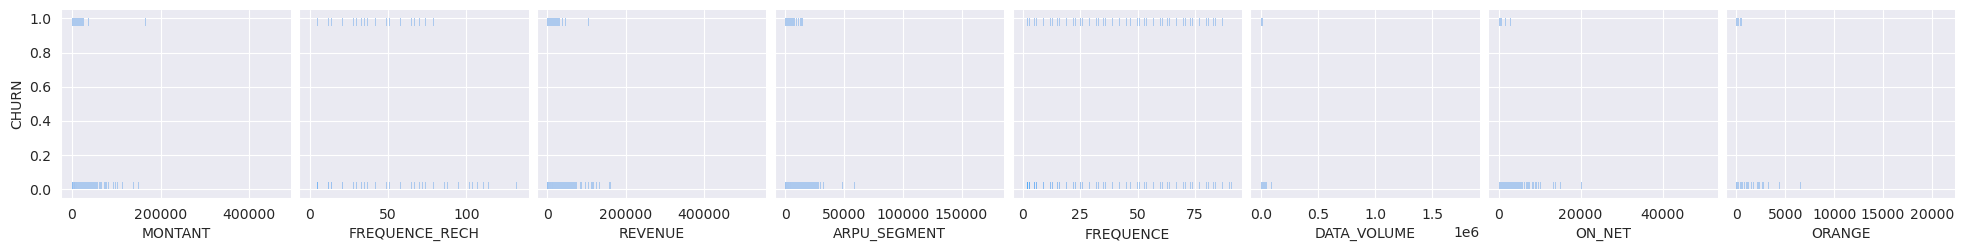

In [ ]:
columns_names=list(X.columns)
pairplot(X_y,y_vars='CHURN',x_vars=num_col_names[:8],kind='hist')


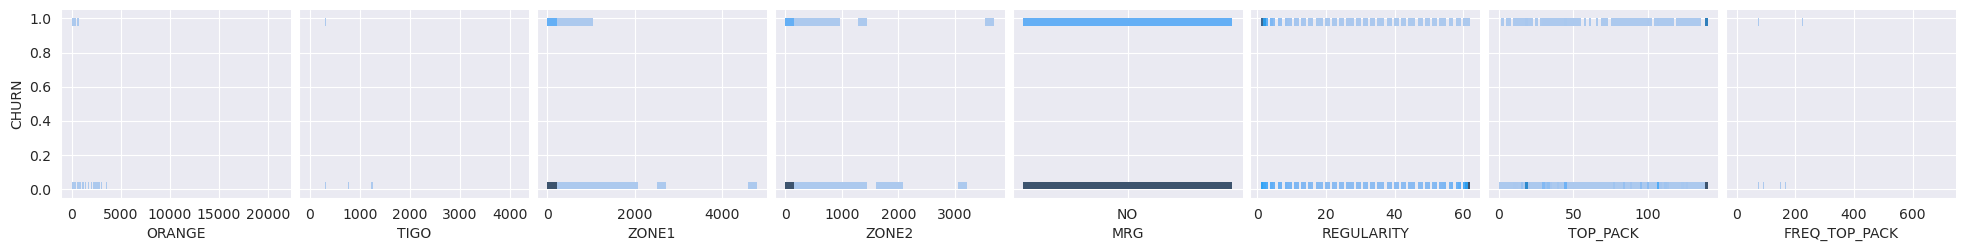

In [ ]:
pairplot(X_y,y_vars='CHURN',x_vars=columns_names[8:16],kind='hist')

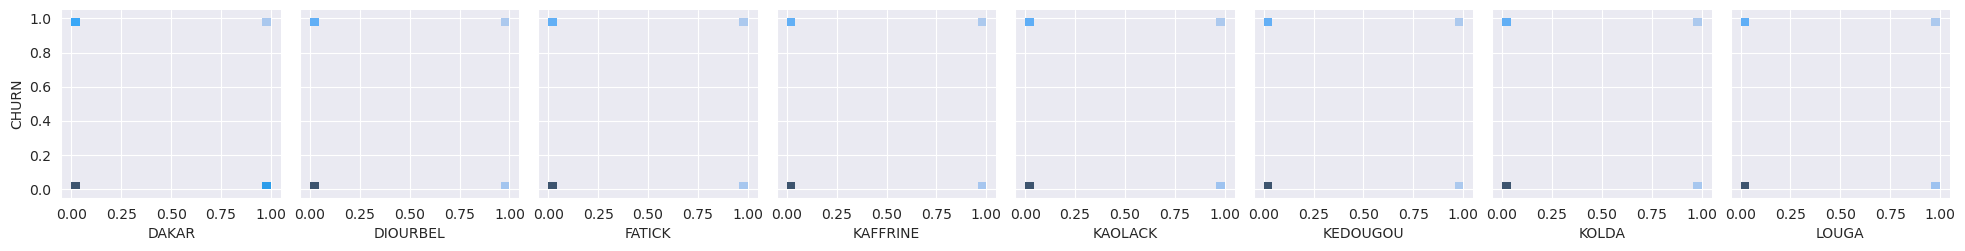

In [ ]:
pairplot(X_y,y_vars='CHURN',x_vars=columns_names[16:24],kind='hist')

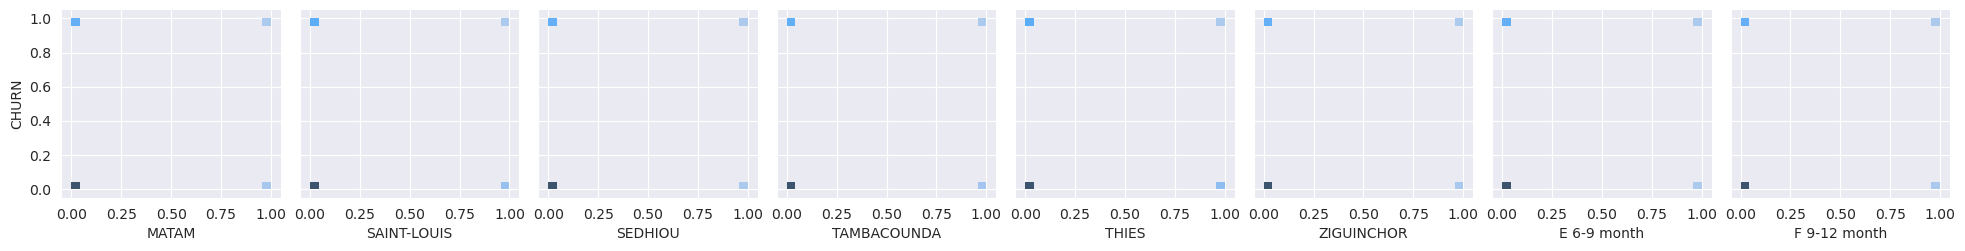

In [ ]:
pairplot(X_y,y_vars='CHURN',x_vars=columns_names[24:32],kind='hist')

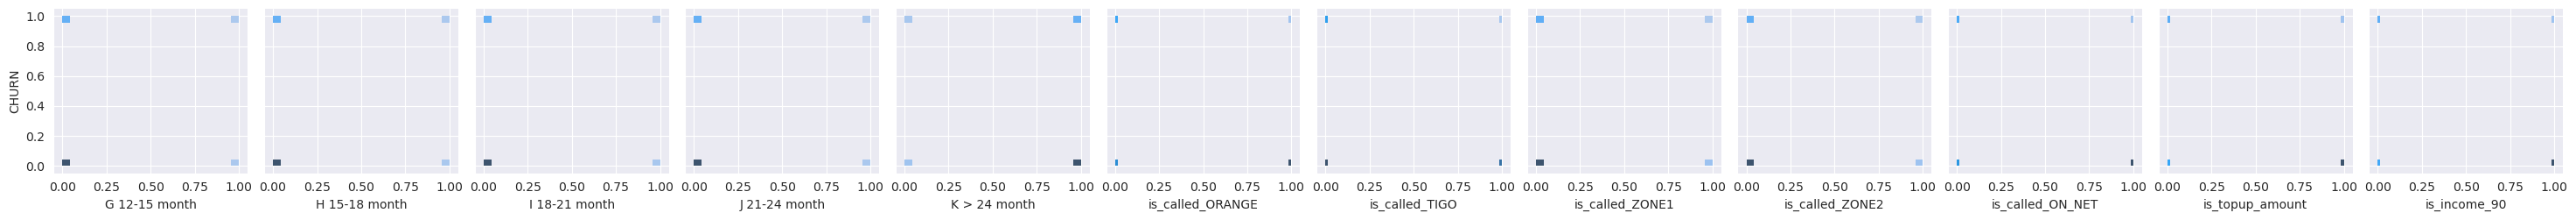

In [ ]:
pairplot(X_y,y_vars='CHURN',x_vars=columns_names[32:],kind='hist')

In [ ]:
# X.set_index('user_id',inplace = True)
# X_y.set_index('user_id',inplace = True)

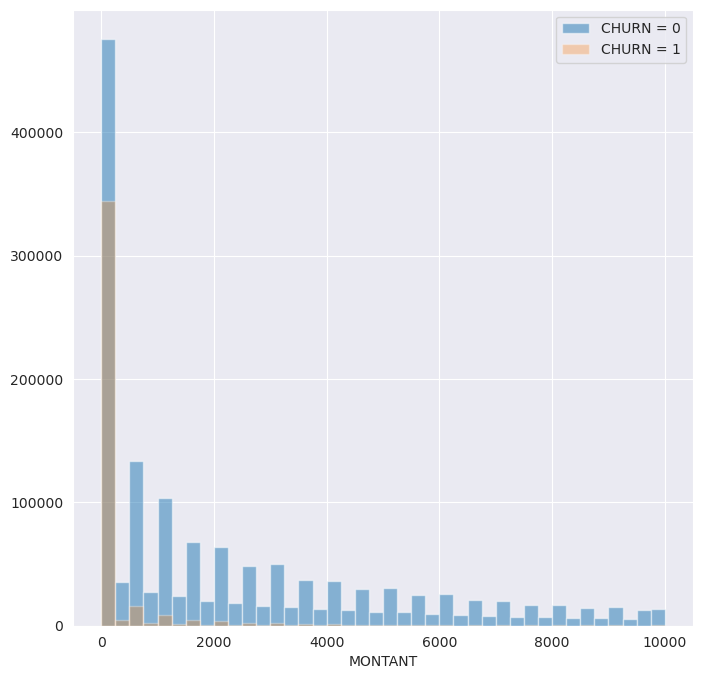

In [ ]:
CHURN_0 = X_y[X_y['CHURN']==0]
CHURN_1 = X_y[X_y['CHURN']==1]
CHURN_0 = CHURN_0['MONTANT']
CHURN_1 = CHURN_1['MONTANT']

import matplotlib.pyplot as plt
plt.hist(CHURN_0,bins=40,label='CHURN = 0',alpha=0.5,range=(0,10000))
plt.hist(CHURN_1,bins=40,label='CHURN = 1',alpha=0.3,range=(0,10000))
plt.xlabel('MONTANT')
plt.legend()
plt.show()

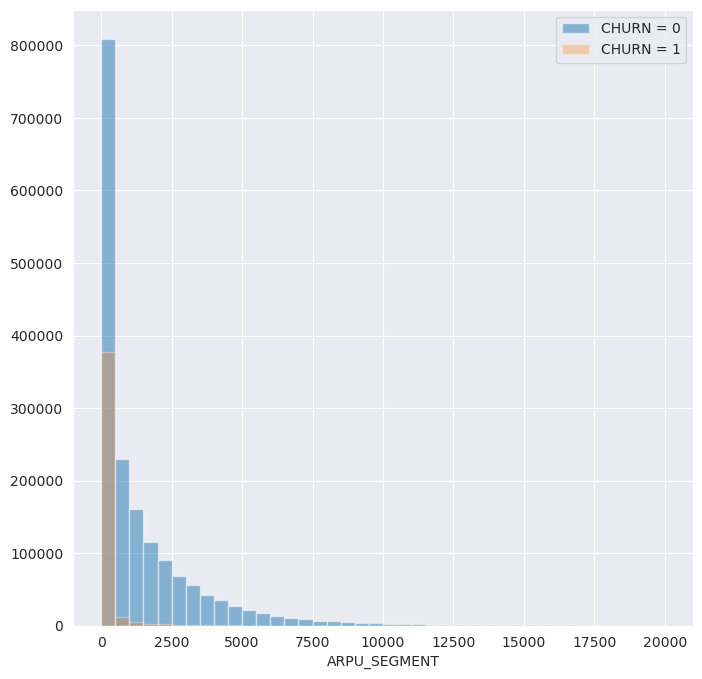

In [ ]:
CHURN_0 = X_y[X_y['CHURN']==0]
CHURN_1 = X_y[X_y['CHURN']==1]
CHURN_0 = CHURN_0['ARPU_SEGMENT']
CHURN_1 = CHURN_1['ARPU_SEGMENT']

import matplotlib.pyplot as plt
plt.hist(CHURN_0,bins=40,label='CHURN = 0',alpha=0.5,range=(0,20000))
plt.hist(CHURN_1,bins=40,label='CHURN = 1',alpha=0.3,range=(0,20000))
plt.xlabel('ARPU_SEGMENT')
plt.legend()
plt.show()

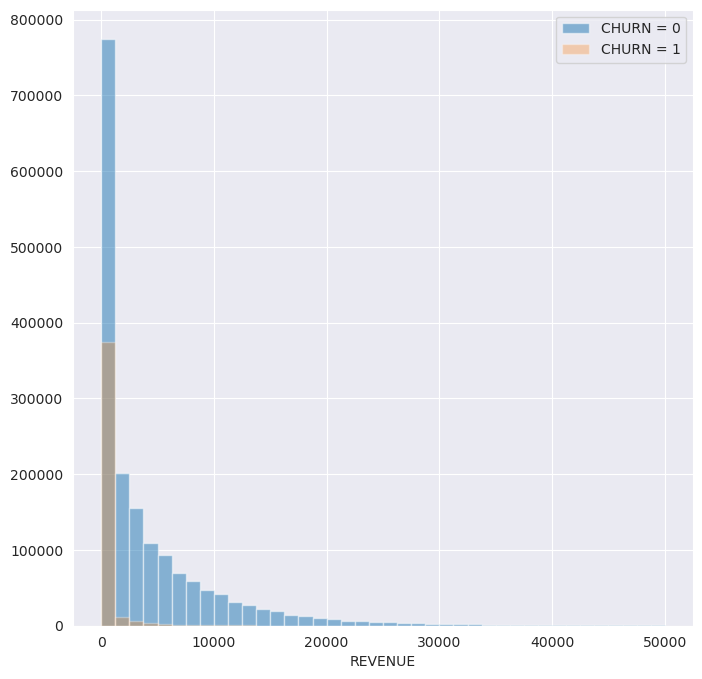

In [ ]:
CHURN_0 = X_y[X_y['CHURN']==0]
CHURN_1 = X_y[X_y['CHURN']==1]
CHURN_0 = CHURN_0['REVENUE']
CHURN_1 = CHURN_1['REVENUE']

import matplotlib.pyplot as plt
plt.hist(CHURN_0,bins=40,label='CHURN = 0',alpha=0.5,range=(0,50000))
plt.hist(CHURN_1,bins=40,label='CHURN = 1',alpha=0.3,range=(0,50000))
plt.xlabel('REVENUE')
plt.legend()
plt.show()

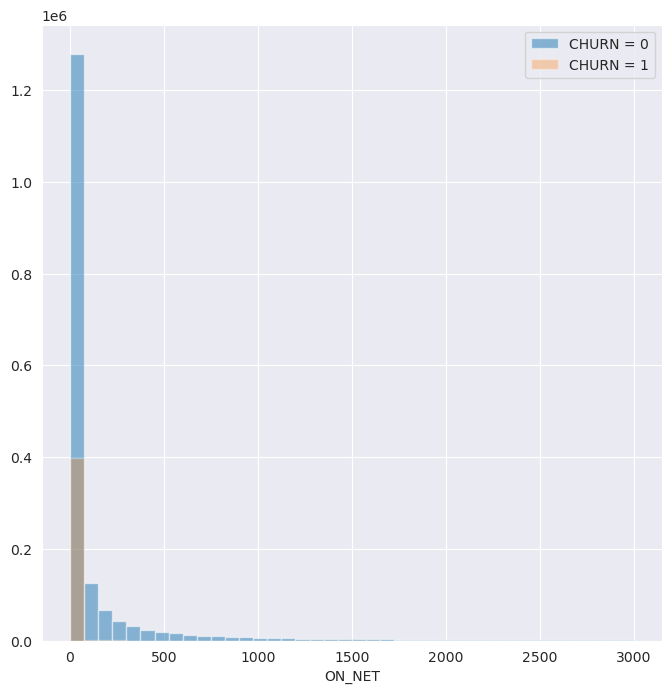

In [ ]:
CHURN_0 = X_y[X_y['CHURN']==0]
CHURN_1 = X_y[X_y['CHURN']==1]
CHURN_0 = CHURN_0['ON_NET']
CHURN_1 = CHURN_1['ON_NET']

import matplotlib.pyplot as plt
plt.hist(CHURN_0,bins=40,label='CHURN = 0',alpha=0.5,range=(0,2000))
plt.hist(CHURN_1,bins=40,label='CHURN = 1',alpha=0.3,range=(0,2000))
plt.xlabel('ON_NET')
plt.legend()
plt.show()

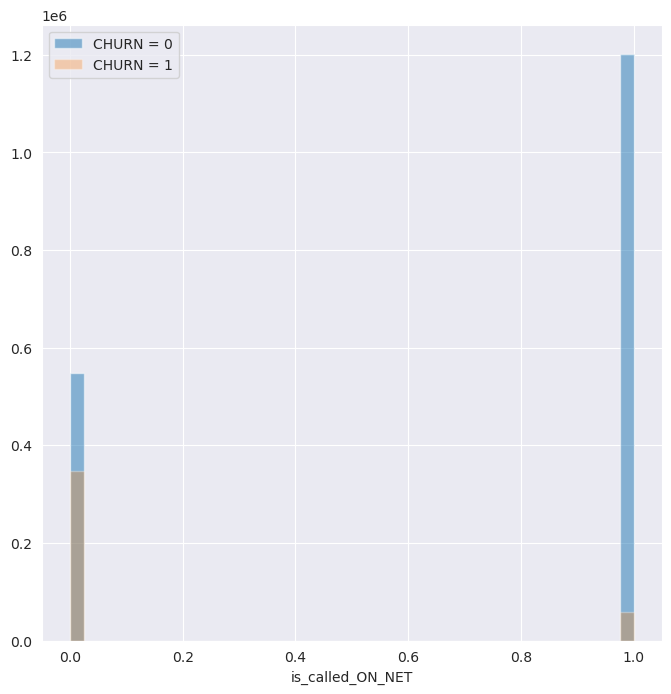

In [ ]:
CHURN_0 = X_y[X_y['CHURN']==0]
CHURN_1 = X_y[X_y['CHURN']==1]
CHURN_0 = CHURN_0['is_called_ON_NET']
CHURN_1 = CHURN_1['is_called_ON_NET']

import matplotlib.pyplot as plt
plt.hist(CHURN_0,bins=40,label='CHURN = 0',alpha=0.5)
plt.hist(CHURN_1,bins=40,label='CHURN = 1',alpha=0.3)
plt.xlabel('is_called_ON_NET')
plt.legend()
plt.show()

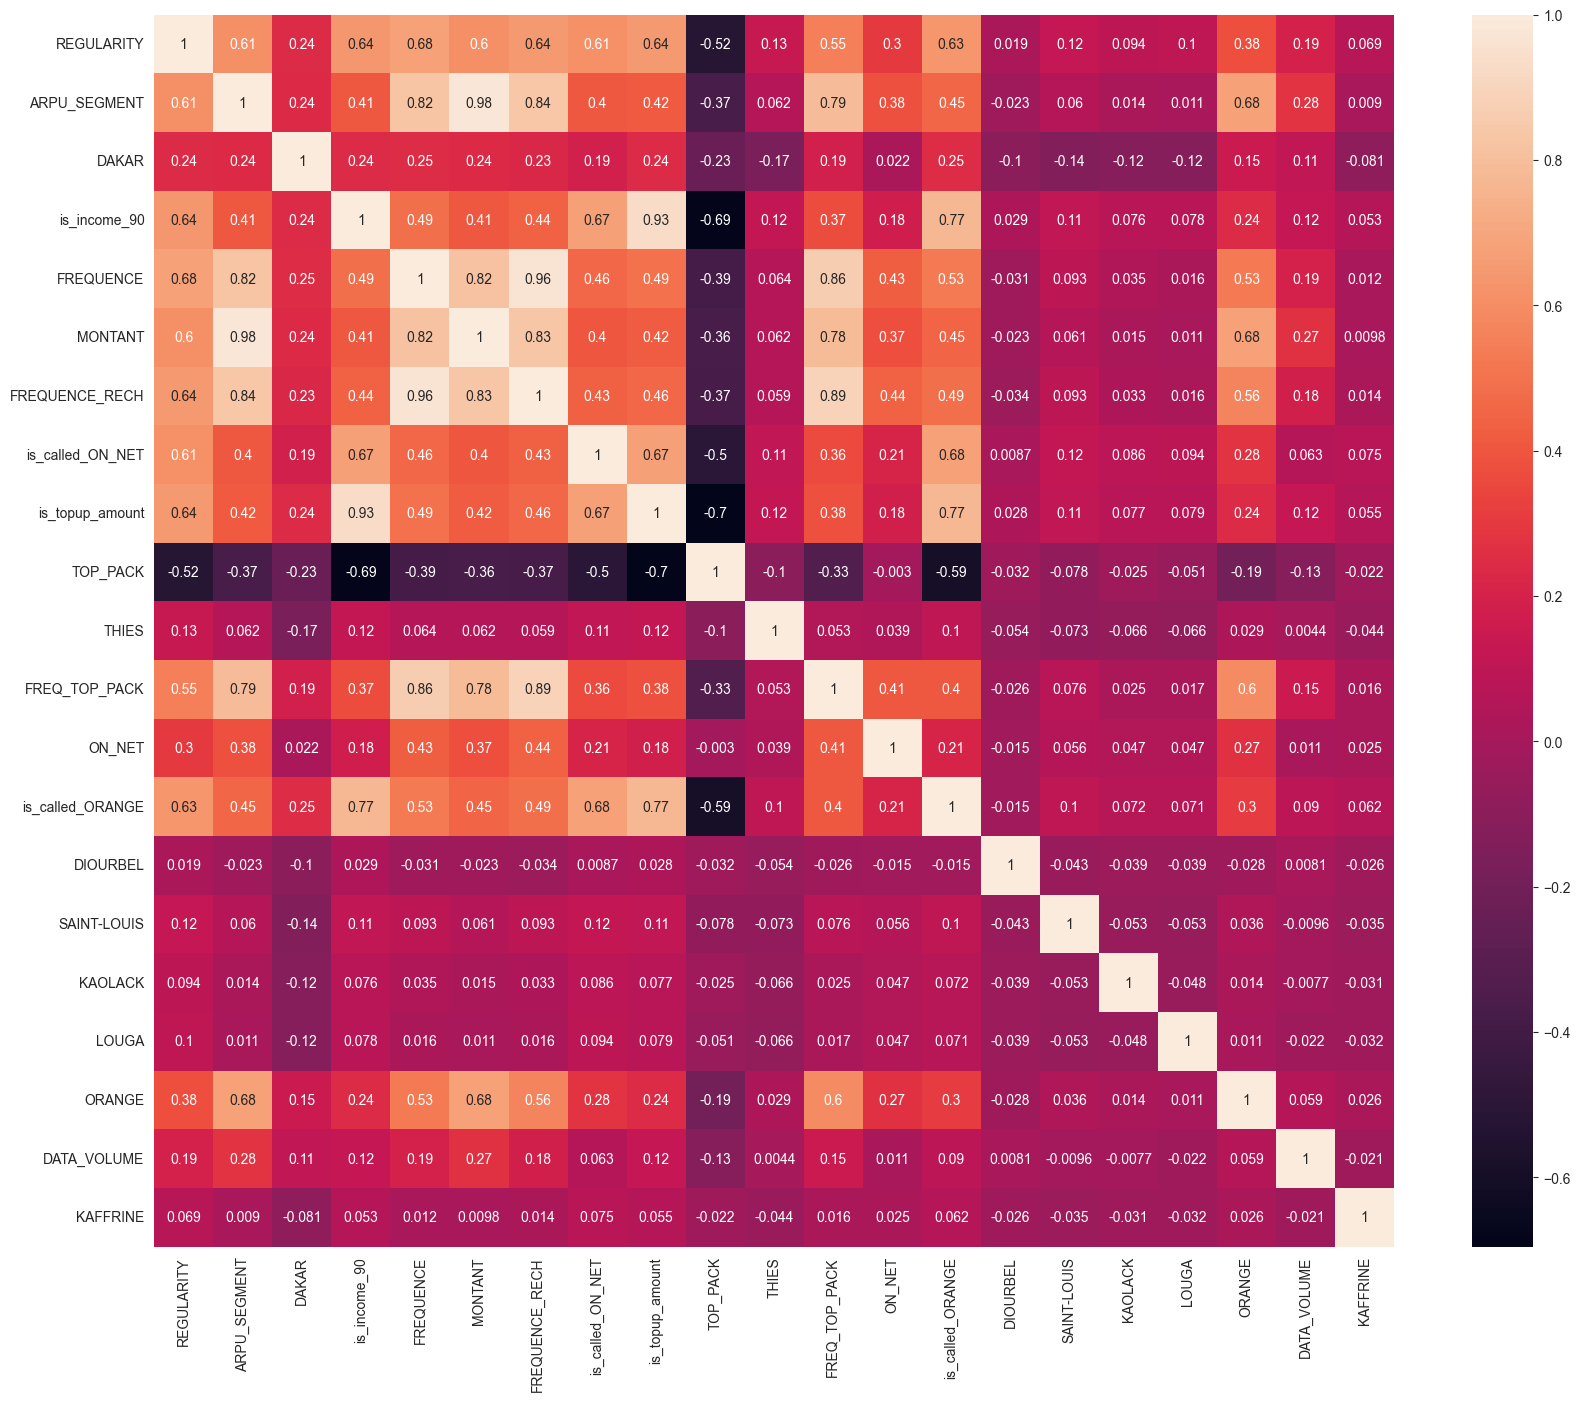

In [14]:
correlation_matrix = X[['REGULARITY', 'ARPU_SEGMENT', 'DAKAR', 'is_income_90', 'FREQUENCE', 'MONTANT', 'FREQUENCE_RECH', 'is_called_ON_NET', 'is_topup_amount', 'TOP_PACK', 'THIES', 'FREQ_TOP_PACK', 'ON_NET', 'is_called_ORANGE', 'DIOURBEL', 'SAINT-LOUIS', 'KAOLACK', 'LOUGA', 'ORANGE', 'DATA_VOLUME', 'KAFFRINE']].corr()
fig, ax = plt.subplots(figsize=(20, 16))
sb.heatmap(correlation_matrix, annot=True)
plt.plot()
plt.show()

In [8]:
#Delete 'MRG' column.  All values are 'NO'.
X = X.drop(['REVENUE', 'user_id', 'MRG'], axis=1)

In [11]:
X.shape

(2154048, 41)

## Random forest

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [47]:
Forest = RandomForestClassifier(n_jobs=-1, random_state=42)
Forest_clf_parameters = {'n_estimators': [50, 100, 200],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [2, 4, 6, 8], 
                         'min_samples_split': [2, 5, 8]}
grid_search_cv_forest_clf = GridSearchCV(Forest, Forest_clf_parameters, cv=5, verbose=3)
grid_search_cv_forest_clf.fit(X_train, y_train)

Forest_clf = grid_search_cv_forest_clf.best_estimator_
y_pred_train = Forest_clf.predict(X_train)
y_pred_test = Forest_clf.predict(X_test)
grid_search_cv_forest_clf.best_params_
#best parameters: {'max_depth': 15, 'n_estimators': 100}

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......max_depth=5, n_estimators=50;, score=0.873 total time= 1.1min
[CV 2/5] END ......max_depth=5, n_estimators=50;, score=0.873 total time=  46.1s
[CV 3/5] END ......max_depth=5, n_estimators=50;, score=0.873 total time=  47.8s
[CV 4/5] END ......max_depth=5, n_estimators=50;, score=0.872 total time=  48.6s
[CV 5/5] END ......max_depth=5, n_estimators=50;, score=0.872 total time=  46.0s
[CV 1/5] END .....max_depth=5, n_estimators=100;, score=0.874 total time= 1.7min
[CV 2/5] END .....max_depth=5, n_estimators=100;, score=0.874 total time= 1.7min
[CV 3/5] END .....max_depth=5, n_estimators=100;, score=0.875 total time= 1.7min
[CV 4/5] END .....max_depth=5, n_estimators=100;, score=0.874 total time= 1.6min
[CV 5/5] END .....max_depth=5, n_estimators=100;, score=0.873 total time= 1.5min
[CV 1/5] END .....max_depth=5, n_estimators=200;, score=0.874 total time= 3.2min
[CV 2/5] END .....max_depth=5, n_estimators=200;,

{'max_depth': 15, 'n_estimators': 100}

In [87]:
Forest_clf = RandomForestClassifier(n_jobs=-1, random_state=42, max_depth=20, n_estimators=100, min_samples_leaf=8, min_samples_split=2)
Forest_clf.fit(X_train, y_train)
y_pred_train = Forest_clf.predict(X_train)
y_pred_test = Forest_clf.predict(X_test)

Train accuracy score: 0.881
Test accuracy score: 0.879

Train f1 score: 0.656
Test f1 score: 0.653
ROC-AUC score for train: 0.936
ROC-AUC score for test: 0.930


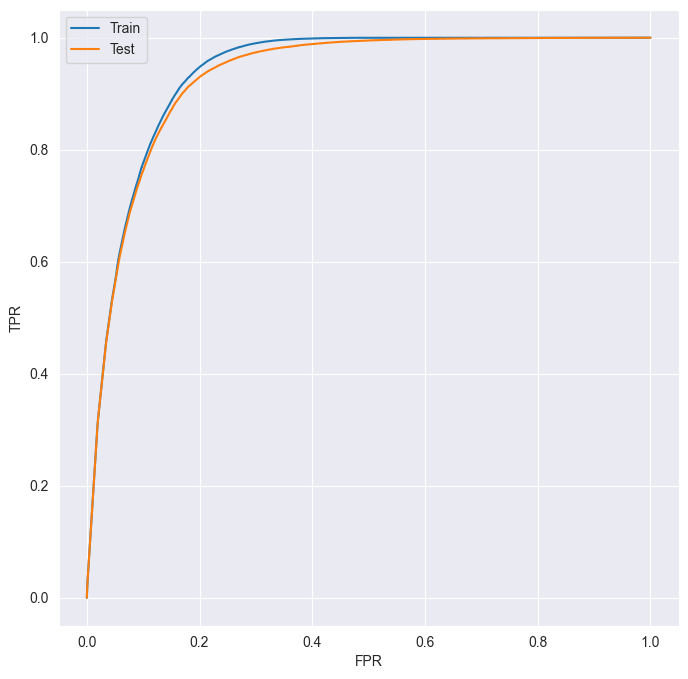

In [88]:
# Score using Random Forest Classifier
print(f'Train accuracy score: {accuracy_score(y_train, y_pred_train):.3f}')
print(f'Test accuracy score: {accuracy_score(y_test, y_pred_test):.3f}')
print()
print(f'Train f1 score: {f1_score(y_train, Forest_clf.predict(X_train)):.3f}')
print(f'Test f1 score: {f1_score(y_test, Forest_clf.predict(X_test)):.3f}')
print()
y_pred_forest_train = Forest_clf.predict_proba(X_train)
y_pred_forest_test = Forest_clf.predict_proba(X_test)
print(f'ROC-AUC score for train: {roc_auc_score(y_train, y_pred_forest_train[:, 1]):.3f}')
print(f'ROC-AUC score for test: {roc_auc_score(y_test, y_pred_forest_test[:, 1]):.3f}')

fpr_forest_train, tpr_forest_train, _train = roc_curve(y_train,  y_pred_forest_train[:, 1])
fpr_forest_test, tpr_forest_test, _test = roc_curve(y_test,  y_pred_forest_test[:, 1])
#create ROC curve
plt.plot(fpr_forest_train, tpr_forest_train, label='Train')
plt.plot(fpr_forest_test, tpr_forest_test, label='Test')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

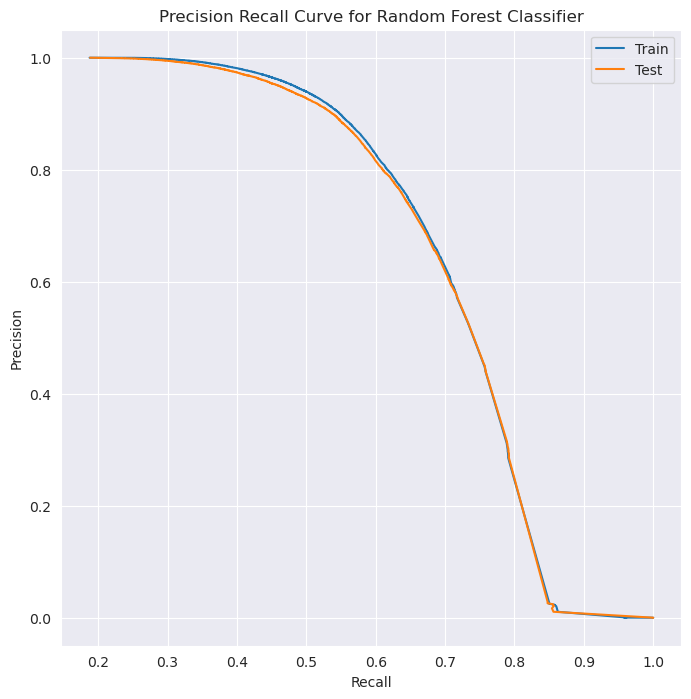

In [16]:
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_pred_forest_train[:, 1])
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_pred_forest_test[:, 1])
#create Precision-Recall curve
plt.plot(precision_train, recall_train, label='Train')
plt.plot(precision_test, recall_test, label='Test')
plt.title('Precision Recall Curve for Random Forest Classifier')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [104]:
Forest_feature_importances = pd.DataFrame({'importance': Forest_clf.feature_importances_}, index=list(X_train))
Forest_feature_importances = Forest_feature_importances.sort_values('importance', ascending=True).plot(kind='barh')

In [16]:
important_feat_top_20 = ['REGULARITY', 'ARPU_SEGMENT', 'DAKAR', 'is_income_90', 'FREQUENCE', 'MONTANT', 'FREQUENCE_RECH', 'is_called_ON_NET', 'is_topup_amount', 'TOP_PACK', 'THIES', 'FREQ_TOP_PACK', 'ON_NET', 'is_called_ORANGE', 'DIOURBEL', 'SAINT-LOUIS', 'KAOLACK', 'LOUGA', 'ORANGE', 'DATA_VOLUME', 'KAFFRINE']

Forest_clf_top_20 = RandomForestClassifier(n_jobs=-1, random_state=42, max_depth=20, n_estimators=100, min_samples_leaf=8, min_samples_split=2)
Forest_clf_top_20.fit(X_train[important_feat_top_20], y_train)
y_pred_train_top20 = Forest_clf_top_20.predict(X_train[important_feat_top_20])
y_pred_test_top20 = Forest_clf_top_20.predict(X_test[important_feat_top_20])

In [ ]:
# Score using Random Forest Classifier
print(f'Train accuracy score: {accuracy_score(y_train, y_pred_train_top20):.3f}')
print(f'Test accuracy score: {accuracy_score(y_test, y_pred_test_top20):.3f}')
print()
print(f'Train f1 score: {f1_score(y_train, Forest_clf.predict(X_train)):.3f}')
print(f'Test f1 score: {f1_score(y_test, Forest_clf.predict(X_test)):.3f}')

y_pred_forest_train = Forest_clf.predict_proba(X_train)
y_pred_forest_test = Forest_clf.predict_proba(X_test)
print(f'ROC-AUC score for train: {roc_auc_score(y_train, y_pred_forest_train[:, 1]):.3f}')
print(f'ROC-AUC score for test: {roc_auc_score(y_test, y_pred_forest_test[:, 1]):.3f}')

fpr_forest_train, tpr_forest_train, _train = roc_curve(y_train,  y_pred_forest_train[:, 1])
fpr_forest_test, tpr_forest_test, _test = roc_curve(y_test,  y_pred_forest_test[:, 1])
#create ROC curve
plt.plot(fpr_forest_train, tpr_forest_train, label='Train')
plt.plot(fpr_forest_test, tpr_forest_test, label='Test')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## Logistic regression

In [38]:
num_col_names =  ['MONTANT', 'FREQUENCE_RECH', 'ARPU_SEGMENT', 'FREQUENCE',
                  'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2','REGULARITY', 'FREQ_TOP_PACK']
scaler = StandardScaler()
X_train[num_col_names] = scaler.fit_transform(X_train[num_col_names])
X_test[num_col_names] = scaler.fit_transform(X_test[num_col_names])

In [27]:
reg = LogisticRegression(penalty='l2', C=100)

params_grid = {'C':np.logspace(-2,4,7)}

gs1 = GridSearchCV(reg, param_grid=params_grid,verbose=3,n_jobs=-1)
gs1.fit(X_train, y_train)
gs1.best_estimator_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


LogisticRegression(C=100.0)

In [39]:
reg = LogisticRegression(penalty='l2', C=100)
reg.fit(X_train[num_col_names], y_train)

LogisticRegression(C=100)

In [47]:
# best_log_regressor = gs1.best_estimator_
print(f'Train accuracy score: {accuracy_score(y_train, reg.predict(X_train[num_col_names])):.3f}')
print(f'Test accuracy score: {accuracy_score(y_test, reg.predict(X_test[num_col_names])):.3f}')
y_pred_log_train = reg.predict_proba(X_train[num_col_names])
y_pred_log_test = reg.predict_proba(X_test[num_col_names])
print()
print(f'Train f1 score: {f1_score(y_train, reg.predict(X_train[num_col_names])):.3f}')
print(f'Test f1 score: {f1_score(y_test, reg.predict(X_test[num_col_names])):.3f}')
print()
print(f'ROC-AUC score for train: {roc_auc_score(y_train, y_pred_log_train[:, 1]):.3f}')
print(f'ROC-AUC score for test: {roc_auc_score(y_test, y_pred_log_test[:, 1]):.3f}')

Train accuracy score: 0.858
Test accuracy score: 0.858

Train f1 score: 0.574
Test f1 score: 0.575

ROC-AUC score for train: 0.891
ROC-AUC score for test: 0.891


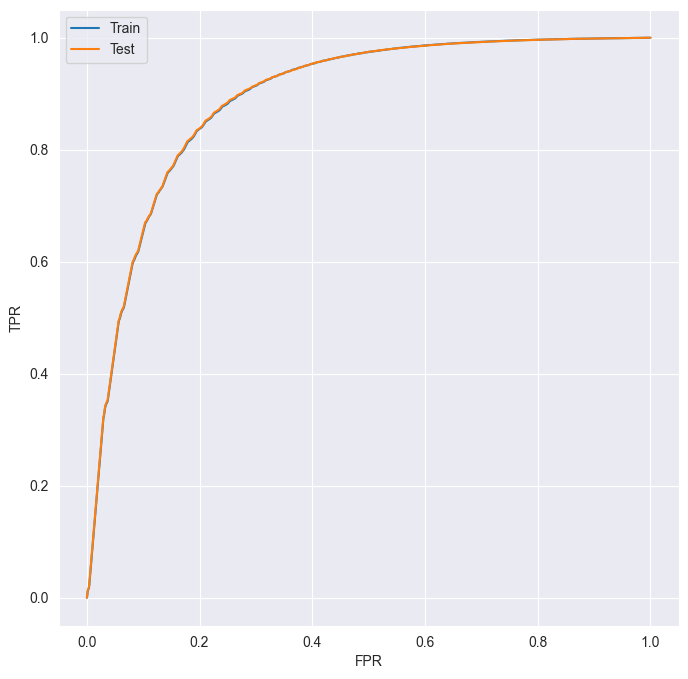

In [43]:
fpr_log_train, tpr_log_train, _train = roc_curve(y_train,  y_pred_log_train[:, 1])
fpr_log_test, tpr_log_test, _test = roc_curve(y_test,  y_pred_log_test[:, 1])
#create ROC curve
plt.plot(fpr_log_train, tpr_log_train, label='Train')
plt.plot(fpr_log_test, tpr_log_test, label='Test')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

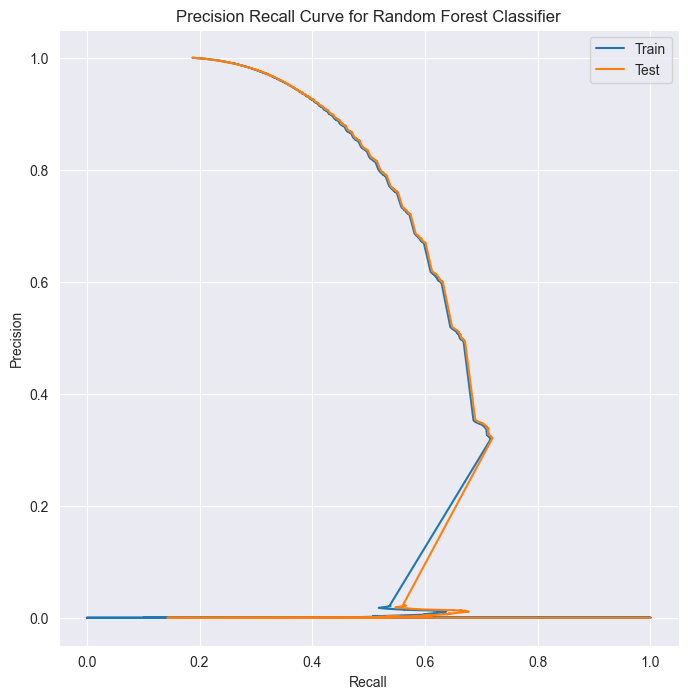

In [44]:
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_pred_log_train[:, 1])
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_pred_log_test[:, 1])
#create Precision-Recall curve
plt.plot(precision_train, recall_train, label='Train')
plt.plot(precision_test, recall_test, label='Test')
plt.title('Precision Recall Curve for Random Forest Classifier')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [37]:
log_weights = pd.DataFrame(data={'feature':list(X_train.columns), 'weight_abs':list(abs(gs1.best_estimator_.coef_[0])), 'weight':list(gs1.best_estimator_.coef_[0])})
log_weights = weights.sort_values(by=['weight_abs'], ascending=False)
log_weights.set_index('feature',inplace=True)
log_weights.head(3)

,weight_abs,weight
feature,,
REGULARITY,0.124274,-0.124274
FREQUENCE,0.007899,-0.007899
FREQUENCE_RECH,0.004172,-0.004172


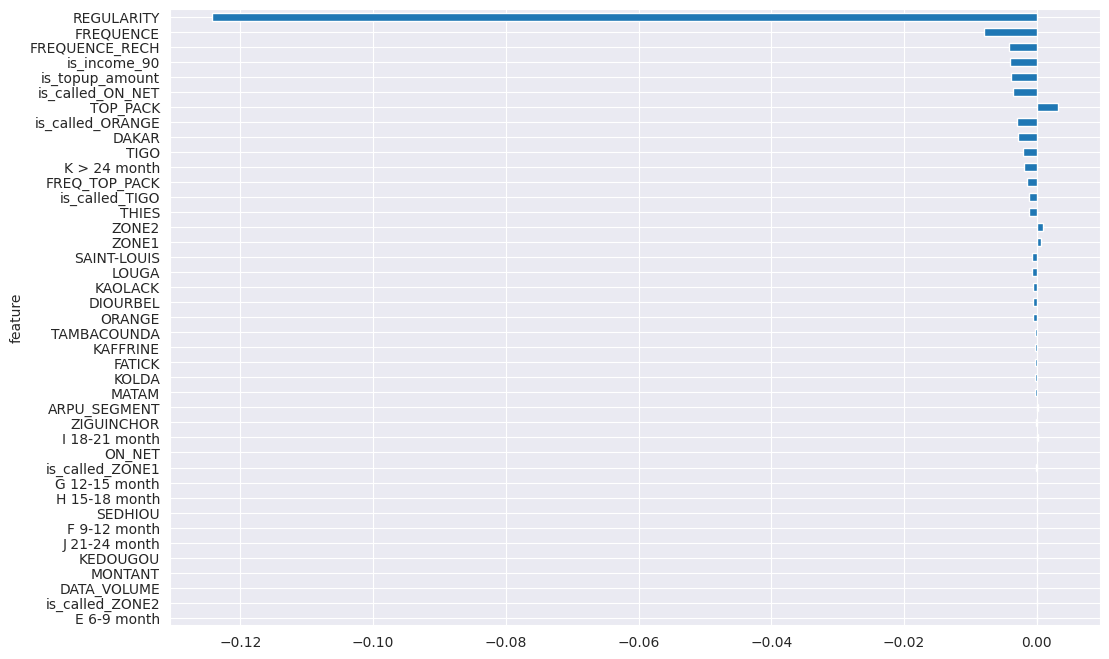

In [39]:

log_feature = log_weights.sort_values('weight_abs')['weight'].plot(kind='barh', figsize=(12, 8))

### CatBoost

In [50]:
from catboost import CatBoostClassifier
CB_model = CatBoostClassifier(iterations=500,
                           random_seed=42,
                           loss_function='MultiClass')

CB_model.fit(X_train, y_train)

Learning rate set to 0.207849
0:	learn: 0.5752433	total: 285ms	remaining: 2m 22s
1:	learn: 0.4976190	total: 605ms	remaining: 2m 30s
2:	learn: 0.4430127	total: 851ms	remaining: 2m 20s
3:	learn: 0.4030033	total: 1.11s	remaining: 2m 18s
4:	learn: 0.3734004	total: 1.39s	remaining: 2m 17s
5:	learn: 0.3508940	total: 1.66s	remaining: 2m 16s
6:	learn: 0.3338631	total: 1.9s	remaining: 2m 14s
7:	learn: 0.3208624	total: 2.14s	remaining: 2m 11s
8:	learn: 0.3096130	total: 2.4s	remaining: 2m 11s
9:	learn: 0.3016976	total: 2.65s	remaining: 2m 10s
10:	learn: 0.2944127	total: 2.9s	remaining: 2m 8s
11:	learn: 0.2898722	total: 3.13s	remaining: 2m 7s
12:	learn: 0.2851317	total: 3.38s	remaining: 2m 6s
13:	learn: 0.2808998	total: 3.64s	remaining: 2m 6s
14:	learn: 0.2779979	total: 3.89s	remaining: 2m 5s
15:	learn: 0.2760899	total: 4.14s	remaining: 2m 5s
16:	learn: 0.2735341	total: 4.38s	remaining: 2m 4s
17:	learn: 0.2717265	total: 4.63s	remaining: 2m 3s
18:	learn: 0.2696455	total: 4.88s	remaining: 2m 3s
19:	

In [49]:
# Score using Catboost
y_pred_train_cat = CB_model.predict(X_train)
y_pred_test_cat = CB_model.predict(X_test)
print(f'Train accuracy score: {accuracy_score(y_train, y_pred_train_cat):.3f}')
print(f'Test accuracy score: {accuracy_score(y_test, y_pred_test_cat):.3f}')
print()
print(f'Train f1 score: {f1_score(y_train, CB_model.predict(X_train)):.3f}')
print(f'Test f1 score: {f1_score(y_test, CB_model.predict(X_test)):.3f}')

y_pred_forest_train_cat = CB_model.predict_proba(X_train)
y_pred_forest_test_cat = CB_model.predict_proba(X_test)
print()
print(f'ROC-AUC score for train: {roc_auc_score(y_train, y_pred_forest_train_cat[:, 1]):.3f}')
print(f'ROC-AUC score for test: {roc_auc_score(y_test, y_pred_forest_test_cat[:, 1]):.3f}')

Train accuracy score: 0.792
Test accuracy score: 0.792

Train f1 score: 0.625
Test f1 score: 0.626

ROC-AUC score for train: 0.902
ROC-AUC score for test: 0.902


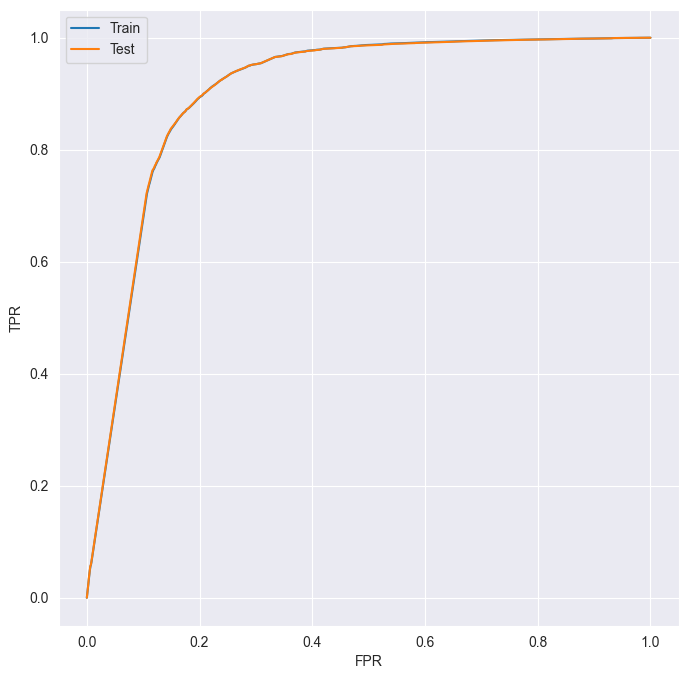

In [53]:
fpr_cat_train, tpr_cat_train, _train = roc_curve(y_train,  y_pred_forest_train_cat[:, 1])
fpr_cat_test, tpr_cat_test, _test = roc_curve(y_test,  y_pred_forest_test_cat[:, 1])
#create ROC curve

plt.plot(fpr_cat_train, tpr_cat_train, label='Train')
plt.plot(fpr_cat_test, tpr_cat_test, label='Test')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()